**BANK CUSTOMER CHURN PREDICTION**

**Import Libraries**

In [451]:
import pandas as pd

**READ DATA**

In [452]:
#step 2 : read data/ import data
data = pd.read_csv('/kaggle/input/customer-churn/Bank Churn Modelling.csv')

In [453]:
data.shape

(10000, 13)

**Checking Head**

In [454]:
data.head(10)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


**Checking Tail **

In [455]:
data.tail()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [456]:
data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [457]:
data.duplicated('CustomerId').sum()

0

In [458]:
data= data.set_index('CustomerId')

**Checking Information Of Data**

In [459]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


**Checking For Null Data**

In [460]:
data.isnull()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
CustomerId,,,,,,,,,,,,
15634602,False,False,False,False,False,False,False,False,False,False,False,False
15647311,False,False,False,False,False,False,False,False,False,False,False,False
15619304,False,False,False,False,False,False,False,False,False,False,False,False
15701354,False,False,False,False,False,False,False,False,False,False,False,False
15737888,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
15606229,False,False,False,False,False,False,False,False,False,False,False,False
15569892,False,False,False,False,False,False,False,False,False,False,False,False
15584532,False,False,False,False,False,False,False,False,False,False,False,False


In [461]:
data['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [462]:
data.replace({'Geography':{'France': 2, 'Germany': 1,'Spain' : 0}}, inplace= True)

In [463]:
data['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [464]:
data.replace({'Gender':{'Male': 0, 'Female': 1}}, inplace= True)

In [465]:
data['Num Of Products'].value_counts()

Num Of Products
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [466]:
data.replace({'Num Of Products':{1: 0, 2: 1, 3 : 1, 4 : 1}}, inplace= True)

In [467]:
data.loc[(data['Balance']==0), 'Churn'].value_counts()

Churn
0    3117
1     500
Name: count, dtype: int64

In [468]:
import numpy as np
data['Zero Balance'] = np.where(data['Balance']>0,1,0)

<Axes: >

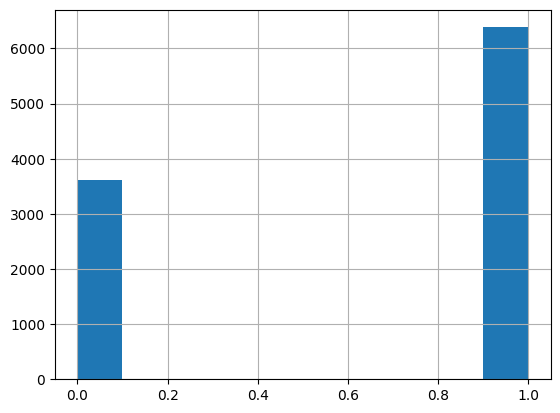

In [469]:
data['Zero Balance'].hist()

In [470]:
data.groupby(['Churn', 'Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

**Vizualizing Data**

In [471]:
import matplotlib.pyplot as plt
import seaborn as sns

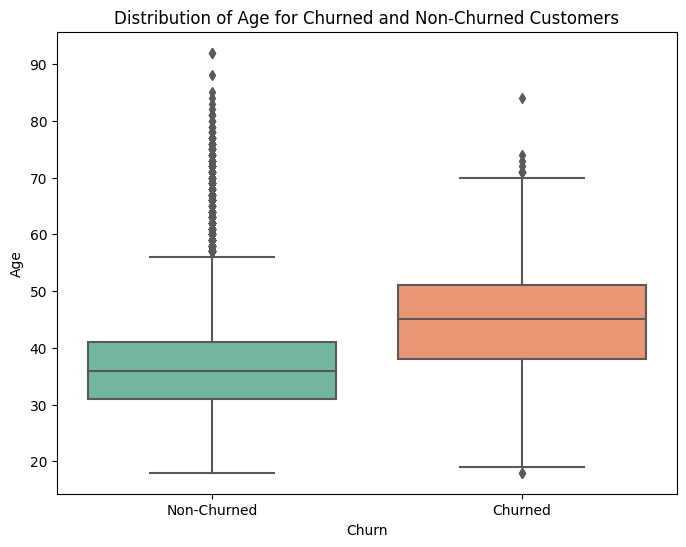

In [472]:
# Create a box plot to visualize the distribution of ages for churned and non-churned customers
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Churn', y='Age', palette='Set2')
plt.xlabel('Churn')
plt.ylabel('Age')
plt.title('Distribution of Age for Churned and Non-Churned Customers')

# Set x-axis ticks and labels
plt.xticks(ticks=[0, 1], labels=['Non-Churned', 'Churned'])
plt.show()

In [473]:
churn_counts = data['Churn'].value_counts()

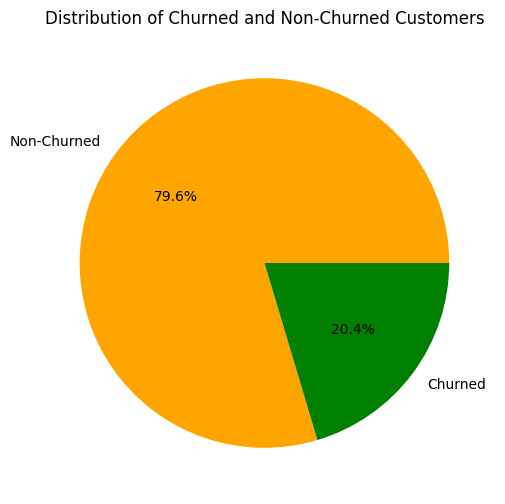

In [561]:
# Create a pie chart to visualize the distribution
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=['Non-Churned', 'Churned'], autopct='%1.1f%%', colors=['orange', 'green'])
plt.title('Distribution of Churned and Non-Churned Customers')
plt.show()

In [475]:
#  Step 3: Feature And Target Selection
data.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [476]:
y = data['Churn']

In [477]:
X = data[['CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'Num Of Products', 'Has Credit Card',
       'Is Active Member', 'Estimated Salary']]

In [478]:
#checking shape
print("Shape of X is: ", X.shape)
print("Shape of y is: ", y.shape)

Shape of X is:  (10000, 10)
Shape of y is:  (10000,)


In [479]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary
CustomerId,,,,,,,,,,
15634602,619,2,1,42,2,0.00,0,1,1,101348.88
15647311,608,0,1,41,1,83807.86,0,0,1,112542.58
15619304,502,2,1,42,8,159660.80,1,1,0,113931.57
15701354,699,2,1,39,1,0.00,1,0,0,93826.63
15737888,850,0,1,43,2,125510.82,0,1,1,79084.10


In [480]:
X.shape, y.shape

((10000, 10), (10000,))

In [481]:
data['Churn'].value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

In [482]:
import seaborn as sns

<Axes: xlabel='Churn', ylabel='count'>

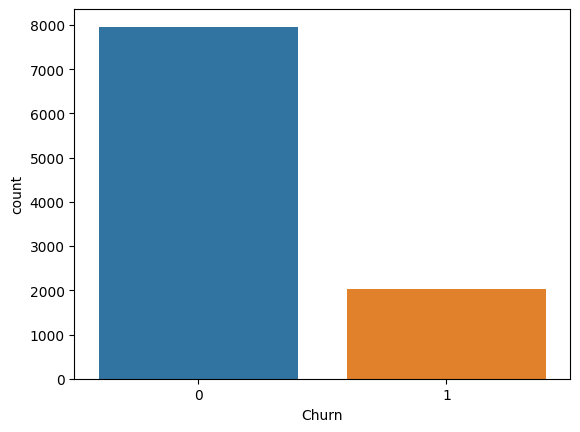

In [483]:
sns.countplot(x='Churn', data = data )

In [484]:
X.shape, y.shape

((10000, 10), (10000,))

In [485]:
#Random Under Sampler

<Axes: ylabel='Frequency'>

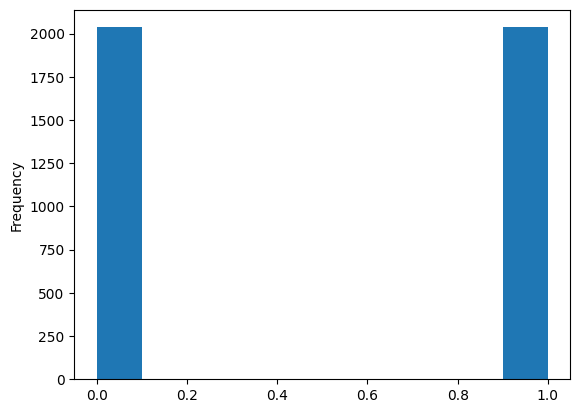

In [486]:
from imblearn.under_sampling import RandomUnderSampler

# Create an instance of RandomUnderSampler
rus = RandomUnderSampler(random_state=2529)

# Use it to resample your data
X_resampled, y_resampled = rus.fit_resample(X, y)
X_resampled.shape, y_resampled.shape, X.shape, y.shape

#creating histogram
y_resampled.plot(kind = 'hist')

<Axes: ylabel='Frequency'>

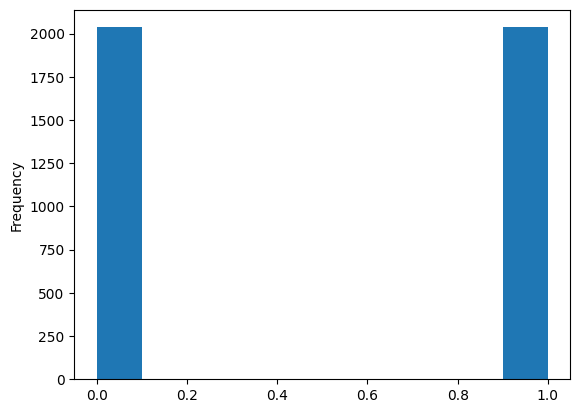

In [487]:
#random oversample
from imblearn.under_sampling import RandomUnderSampler

# Create an instance of RandomUnderSampler
rus = RandomUnderSampler(random_state=2529)

# resample your data
X_resampled, y_resampled = rus.fit_resample(X, y)

#creating histogram
y_resampled.plot(kind = 'hist')

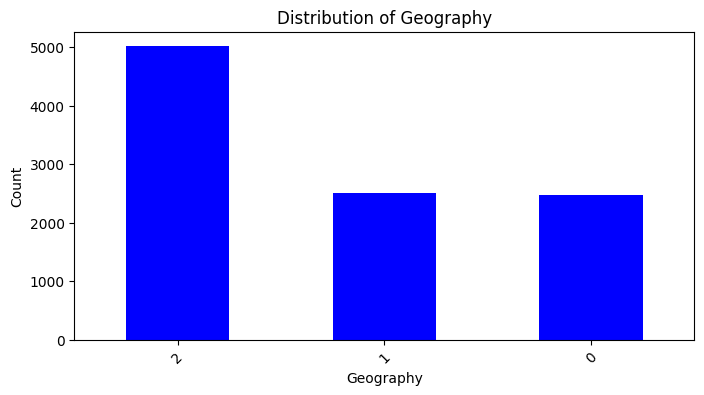

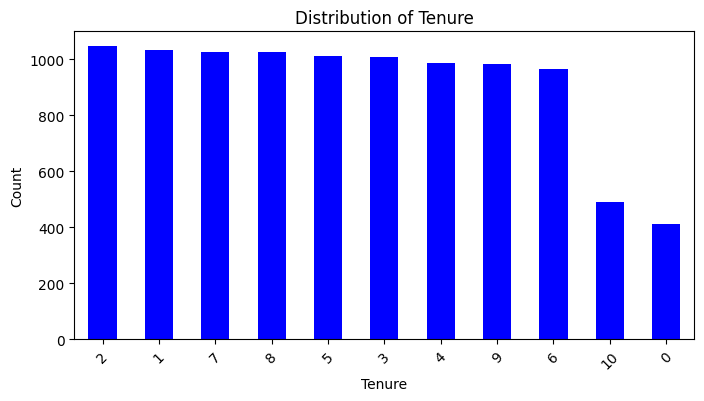

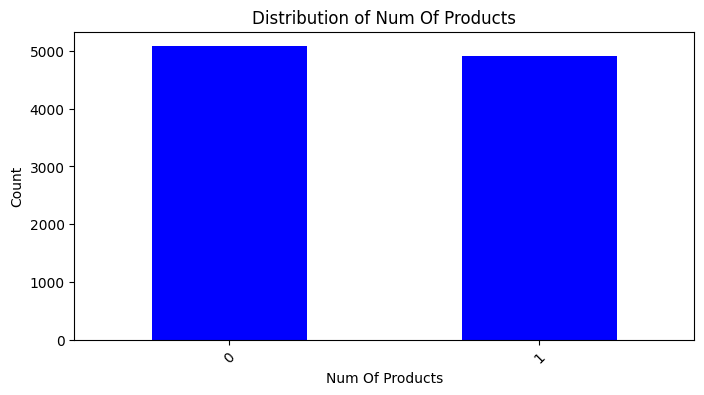

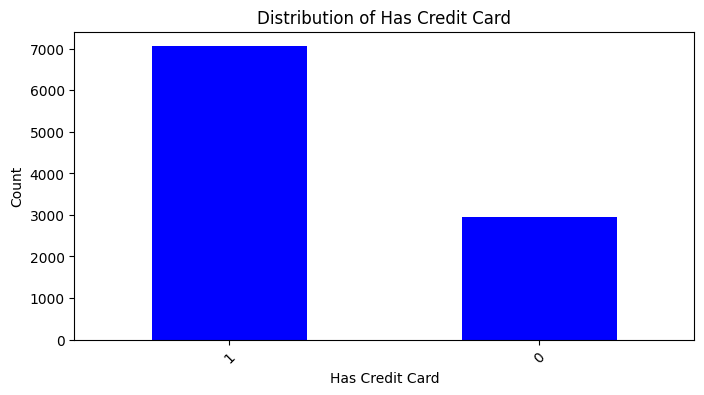

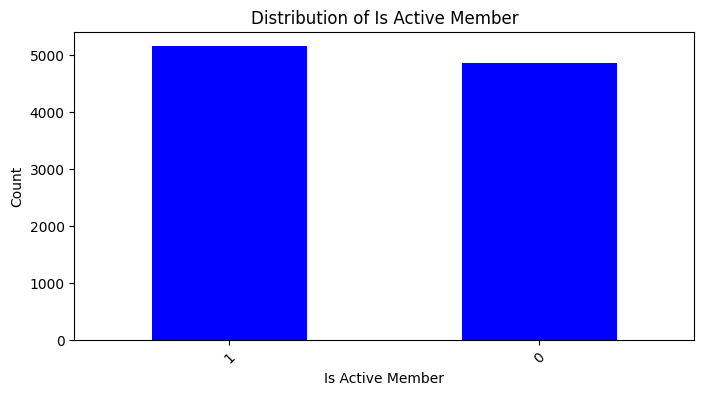

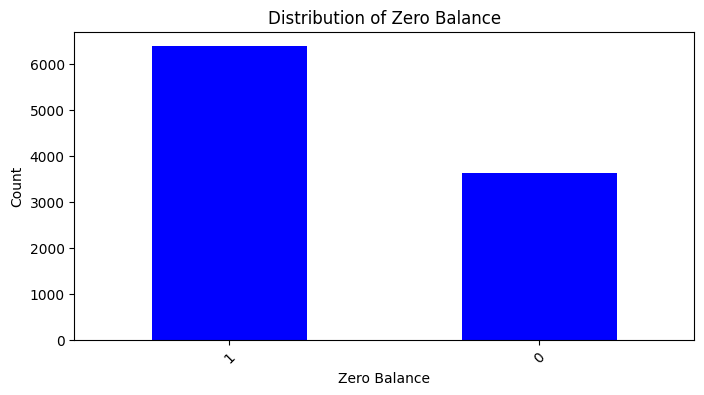

In [558]:
import matplotlib.pyplot as plt

# Columns to exclude from the bar plots
exclude_columns = ['Balance', 'Gender', 'Age', 'Surname', 'CreditScore', 'Estimated Salary']

# Loop through each column in your dataset
for column in data.columns.drop('Churn'):
    if column not in exclude_columns:
        plt.figure(figsize=(8, 4))
        data[column].value_counts().plot(kind='bar', color='blue')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.title(f'Distribution of {column}')
        plt.xticks(rotation=45)  # Rotate x-axis labels if needed for readability
        plt.show()


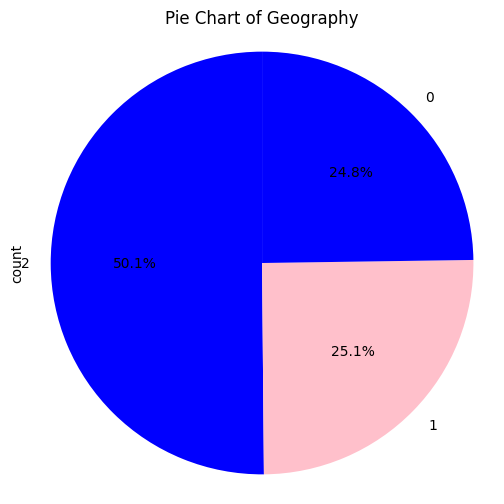

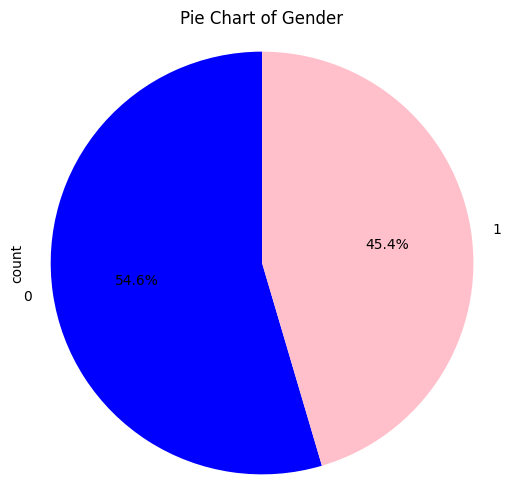

In [560]:
import matplotlib.pyplot as plt

# List of categorical column names (excluding 'CustomerId' and 'Churn' columns)
categorical_columns = ['Geography', 'Gender']

# Loop through each categorical column
for column in categorical_columns:
    plt.figure(figsize=(6, 6))
    data[column].value_counts().plot.pie(autopct='%1.1f%%', colors=['blue', 'pink'], startangle=90)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(f'Pie Chart of {column}')
    plt.show()

In [490]:
# step 4 : train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2529)

In [491]:
#checking shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7500, 10), (2500, 10), (7500,), (2500,))

In [492]:
# Perform Random Under-Sampling
rus = RandomUnderSampler(random_state=2529)
X_rus, y_rus = rus.fit_resample(X, y)

# Perform Random Over-Sampling
ros = RandomOverSampler(random_state=2529)
X_ros, y_ros = ros.fit_resample(X, y)

# Split the Resampled Data into Train and Test Sets
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, y_rus, test_size=0.2, random_state=2529)
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, test_size=0.2, random_state=2529)


**Standarize Feature**

In [493]:
from sklearn.preprocessing import StandardScaler

In [494]:
sc=StandardScaler()

**Standarize Original Data**

In [495]:
X_train[['CreditScore','Age','Tenure', 'Balance','Estimated Salary']] = sc.fit_transform(X_train[['CreditScore','Age','Tenure', 'Balance','Estimated Salary']])

In [496]:
X_test[['CreditScore','Age','Tenure', 'Balance','Estimated Salary']] = sc.fit_transform(X_test[['CreditScore','Age','Tenure', 'Balance','Estimated Salary']])

**Standarize Random Under Sample Data**

In [497]:
X_train_rus[['CreditScore','Age','Tenure', 'Balance','Estimated Salary']] = sc.fit_transform(X_train_rus[['CreditScore','Age','Tenure', 'Balance','Estimated Salary']])

In [498]:
X_test_rus[['CreditScore','Age','Tenure', 'Balance','Estimated Salary']] = sc.fit_transform(X_test_rus[['CreditScore','Age','Tenure', 'Balance','Estimated Salary']])

**Standarize Random Over Sample Data**

In [499]:
X_train_ros[['CreditScore','Age','Tenure', 'Balance','Estimated Salary']] = sc.fit_transform(X_train_ros[['CreditScore','Age','Tenure', 'Balance','Estimated Salary']])

In [500]:
X_test_ros[['CreditScore','Age','Tenure', 'Balance','Estimated Salary']] = sc.fit_transform(X_test_ros[['CreditScore','Age','Tenure', 'Balance','Estimated Salary']])

**Support Vector Machine Classifier**

In [501]:
from sklearn.svm import SVC

In [502]:
svc = SVC()

In [503]:
svc.fit(X_train, y_train)

SVC()

In [504]:
y_pred = svc.predict(X_test)

**Model Accuracy**

In [505]:
from sklearn.metrics import confusion_matrix, classification_report

In [506]:
print("Confusion Matrix is")
confusion_matrix(y_test, y_pred)

Confusion Matrix is


array([[1987,   25],
       [ 358,  130]])

In [507]:
print("Classification Report Is")
print(classification_report(y_test, y_pred))

Classification Report Is
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2012
           1       0.84      0.27      0.40       488

    accuracy                           0.85      2500
   macro avg       0.84      0.63      0.66      2500
weighted avg       0.85      0.85      0.81      2500



**Hyperparameter Tunning**

In [508]:
from sklearn.model_selection import GridSearchCV

In [509]:
para_grid = {'C': [0.1, 1, 10],
            'gamma': [1, 0.1, 0.01],
            'kernel': ['rbf'],
            'class_weight' : ['balanced']}

In [510]:
grid = GridSearchCV(SVC(),para_grid, refit= True, verbose=2, cv= 2)
grid.fit(X_train, y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.6s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.4s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.0s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.1s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.1s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [511]:
print(grid.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [512]:
grid_pred = grid.predict(X_test)

In [513]:
confusion_matrix(y_test,grid_pred)

array([[1794,  218],
       [ 274,  214]])

In [514]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      2012
           1       0.50      0.44      0.47       488

    accuracy                           0.80      2500
   macro avg       0.68      0.67      0.67      2500
weighted avg       0.79      0.80      0.80      2500



**Model With Random Under Sampling**

In [515]:
svc_rus =SVC()

In [516]:
svc_rus.fit(X_train_rus, y_train_rus)

SVC()

In [517]:
y_pred_rus = svc_rus.predict(X_test_rus)

In [518]:
y_pred_rus

array([0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,

**Accuracy**

In [519]:
confusion_matrix(y_test_rus,y_pred_rus)

array([[306, 111],
       [117, 281]])

In [520]:
print(classification_report(y_test_rus,y_pred_rus))

              precision    recall  f1-score   support

           0       0.72      0.73      0.73       417
           1       0.72      0.71      0.71       398

    accuracy                           0.72       815
   macro avg       0.72      0.72      0.72       815
weighted avg       0.72      0.72      0.72       815



**Hyperparameter Tunning**

In [521]:
para_grid = {'C': [0.1, 1, 10],
            'gamma': [1, 0.1, 0.01],
            'kernel': ['rbf'],
            'class_weight' : ['balanced']}

In [522]:
grid_rus = GridSearchCV(SVC(),para_grid, refit= True, verbose=2, cv= 2)
grid_rus.fit(X_train_rus, y_train_rus)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [523]:
print(grid_rus.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=0.1)


In [524]:
grid_rus_pred = grid_rus.predict(X_test_rus)

In [525]:
confusion_matrix(y_test_rus,grid_rus_pred)

array([[306, 111],
       [118, 280]])

In [526]:
print(classification_report(y_test_rus,grid_rus_pred))

              precision    recall  f1-score   support

           0       0.72      0.73      0.73       417
           1       0.72      0.70      0.71       398

    accuracy                           0.72       815
   macro avg       0.72      0.72      0.72       815
weighted avg       0.72      0.72      0.72       815



**Random Over Sampling Model**

In [527]:
svc_ros =SVC()

In [528]:
svc_ros.fit(X_train_ros, y_train_ros)

SVC()

In [529]:
y_pred_ros = svc_ros.predict(X_test_ros)

**Accuracy**

In [530]:
confusion_matrix(y_test_rus,y_pred_rus)

array([[306, 111],
       [117, 281]])

In [531]:
print(classification_report(y_test_rus,y_pred_rus))

              precision    recall  f1-score   support

           0       0.72      0.73      0.73       417
           1       0.72      0.71      0.71       398

    accuracy                           0.72       815
   macro avg       0.72      0.72      0.72       815
weighted avg       0.72      0.72      0.72       815



**Hyperparameter Tunning**

In [532]:
para_grid = {'C': [0.1, 1, 10],
            'gamma': [1, 0.1, 0.01],
            'kernel': ['rbf'],
            'class_weight' : ['balanced']}

In [533]:
grid_ros = GridSearchCV(SVC(),para_grid, refit= True, verbose=2, cv= 2)
grid_ros.fit(X_train_ros, y_train_ros)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.8s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   4.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   4.0s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.9s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.0s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.3s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.5s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [534]:
print(grid_ros.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [535]:
grid_ros_pred = grid_ros.predict(X_test_ros)

**Accuracy**

In [536]:
confusion_matrix(y_test_ros,grid_ros_pred)

array([[1402,  202],
       [  44, 1538]])

In [537]:
print(classification_report(y_test_ros,grid_ros_pred))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      1604
           1       0.88      0.97      0.93      1582

    accuracy                           0.92      3186
   macro avg       0.93      0.92      0.92      3186
weighted avg       0.93      0.92      0.92      3186



**Random Forest**

In [538]:
from sklearn.ensemble import RandomForestClassifier

**For Random Under-Sampled Data**

In [539]:
rf_classifier_rus = RandomForestClassifier(random_state=2529)
rf_classifier_rus.fit(X_train_rus, y_train_rus)

RandomForestClassifier(random_state=2529)

**Random Over-Sampled Data**

In [540]:
rf_classifier_ros = RandomForestClassifier(random_state=2529)
rf_classifier_ros.fit(X_train_ros, y_train_ros)

RandomForestClassifier(random_state=2529)

**Predict on test data for both models**

In [541]:
y_pred_rus = rf_classifier_rus.predict(X_test_rus)

In [542]:
y_pred_ros = rf_classifier_ros.predict(X_test_ros)

**Evaluate model performance**

**For Random Under-Sampled Data**

In [543]:
from sklearn.metrics import accuracy_score, classification_report

In [544]:
accuracy_rus = accuracy_score(y_test_rus, y_pred_rus)

In [550]:
report_rus = classification_report(y_test_rus, y_pred_rus)

In [551]:
accuracy_ros = accuracy_score(y_test_ros, y_pred_ros)

In [552]:
report_ros = classification_report(y_test_ros, y_pred_ros)

**Evaluation results**

In [553]:
print("Random Forest Classifier Results for Random Under-Sampled Data:")
print(f"Accuracy: {accuracy_rus}")
print("Classification Report:")
print(report_rus)

Random Forest Classifier Results for Random Under-Sampled Data:
Accuracy: 0.7030674846625767
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.73      0.71       417
           1       0.70      0.68      0.69       398

    accuracy                           0.70       815
   macro avg       0.70      0.70      0.70       815
weighted avg       0.70      0.70      0.70       815



In [554]:
print("\nRandom Forest Classifier Results for Random Over-Sampled Data:")
print(f"Accuracy: {accuracy_ros}")
print("Classification Report:")
print(report_ros)


Random Forest Classifier Results for Random Over-Sampled Data:
Accuracy: 0.9400502197112367
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      1604
           1       0.91      0.98      0.94      1582

    accuracy                           0.94      3186
   macro avg       0.94      0.94      0.94      3186
weighted avg       0.94      0.94      0.94      3186

